# Classificação de Qualidade dos Cafés

# Introdução

Café é uma das bebidas mais consumidas no mundo e eu, particularmente, amo. Dentre as mais de cem espécies de café existentes no mundo, a Arábica e a Robusta são as mais  comercializadas. Cada espécie possui diferenças e particularidades, proporcionando experiências degustativas únicas para ocada paladar.

1. Arábica: 
* É mais adocicado e ligeiramente ácido. 
* Aroma muito mais suave.
* Teor de cafeína de 1,2%.
* Teor de açúcar com médias entre 6 e 9%.
* É muito mais apreciado e reconhecido pelos consumidores, afinal é um café muito mais saboroso, e é por isso também que os grãos 100% arábica obtêm classificações como gourmet e especial. 

2. Robusta:
* É mais marcante e amargo.
* Aroma mais denso e pesado.
* Teor de cafeína de 2,2%.
* Teor de açúcar com médias entre 3 e 5%.
* Tem um sabor um pouco mais difícil de agradar. No entanto, é muito usado em blends de café solúvel devido ao seu alto grau de solubilidade.

Mesmo assim, é importante dizer que a diferenciação nesses aspectos, muitas vezes, está ligada às condições geográficas da produção, como o tipo de clima e solo.

De forma geral, vale saber que os grãos de café arábica possuem uma gama maior de notas de aroma e sabor, o que oferece experiências sensoriais diversas ao consumidor. 

## Objetivos do projeto:

1. Criar um classificador para distinguir as duas espécies de café (arábica e robusta).

2. Criar um classificador de qualidade para os cafés.

Link do dataset: <a href="https://www.kaggle.com/volpatto/coffee-quality-database-from-cqi" target="_blanck">Kaggle - Coffee Quality database from CQI</a>

Fonte dos dados: <a href="https://database.coffeeinstitute.org/" target="_blanck">Coffee Quality Institute (CQI)</a>

## 1. Importando as Bibliotecas e os Dados

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [140]:
# Exibindo os dados
df = pd.read_csv("merged_data_cleaned.csv")
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [141]:
print("Número de linhas: ",df.shape[0])
print("Número de colunas: ",df.shape[1])

Número de linhas:  1339
Número de colunas:  44


In [102]:
#Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

Os formatos ('DType') de cada coluna estão condizentes com o tipo de dado que elas possuem, assim não será necesário mudanças em seu formato.

## 2. Limpando e Organizando o Dataset

In [103]:
# Apaga a primeira coluna 
df.drop(df.columns[0],axis=1,inplace=True)

Para os problemas de classificação, usaremos recursos baseados em informações geográficas, pós-colheita, defeitos de categoria, pontuações das características do produto. Queremos saber como essas variáveis podem definir a espécie (arábica e robusta) e afetar a qualidade do sabor (Total.Cup.Points). 

Vamos começar separando as colunas com os dados que contém as informações que queremos.

In [105]:
# Lista com as colunas que serão usadas
measures = ["Species","Aroma", "Flavor", "Aftertaste", "Acidity","Body","Balance","Uniformity","Clean.Cup",
            "Sweetness","Moisture","Color","Processing.Method", "Country.of.Origin", "Variety",
             "Category.One.Defects", "Category.Two.Defects", "Quakers", "altitude_mean_meters",
             "Total.Cup.Points"]

In [106]:
# Cria um DataFrame com as colunas da lista
coffee = df[measures]

# Reseta o índice e apaga a coluna index
coffee = coffee.reset_index()
coffee = coffee.drop('index',axis=1)

coffee.head()

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Moisture,Color,Processing.Method,Country.of.Origin,Variety,Category.One.Defects,Category.Two.Defects,Quakers,altitude_mean_meters,Total.Cup.Points
0,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,0.12,Green,Washed / Wet,Ethiopia,NaN,0,0,0.0,2075.0,90.58
1,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,0.12,Green,Washed / Wet,Ethiopia,Other,0,1,0.0,2075.0,89.92
2,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,0.00,NaN,NaN,Guatemala,Bourbon,0,0,0.0,1700.0,89.75
3,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,0.11,Green,Natural / Dry,Ethiopia,NaN,0,2,0.0,2000.0,89.00
4,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,0.12,Green,Washed / Wet,Ethiopia,Other,0,2,0.0,2075.0,88.83


In [107]:
# Alterar o nome das colunas trocando "." por "_"
coffee = coffee.rename(columns={'Clean.Cup':"Clean_Cup", 'Processing.Method':"Processing_Method",
             'Country.of.Origin':"Country_of_Origin",'Category.One.Defects':"Category_One_Defects",
              'Category.Two.Defects':"Category_Two_Defects",'Total.Cup.Points':"Total_Cup_Points"})

Vamos dar uma olhada se existem dados nulos em nosso dataset.

In [108]:
# Dados nulos
def missing(data):
    missing = data.isnull().sum()
    total = missing.sort_values(ascending=False).round(2).sort_values(ascending=True)
    percent = (missing/len(data.index)*100)
    missing_table = pd.concat([total, percent], axis=1, keys=['Qty NaN', '% NaN'])
    return missing_table

missing(coffee)

,Qty NaN,% NaN
Flavor,0,0.000000
Category_One_Defects,0,0.000000
Moisture,0,0.000000
Clean_Cup,0,0.000000
Uniformity,0,0.000000
Sweetness,0,0.000000
Body,0,0.000000
Acidity,0,0.000000
Aftertaste,0,0.000000
Species,0,0.000000


Encontramos algumas colunas com valores nulos. Temos que agora preencher esses dados faltantes.

In [109]:
# Preenchendo dados nulos
coffee['altitude_mean_meters'].fillna(coffee['altitude_mean_meters'].mean(),inplace=True)
coffee['Variety'].fillna("Other",inplace=True)
coffee['Processing_Method'].fillna('Other',inplace=True)
coffee['Color'].fillna("None",inplace=True)
coffee['Quakers'].fillna(0,inplace=True)
coffee['Country_of_Origin'].fillna("Other",inplace=True)

Para que os modelos que iremos usar possam calcular suas predições, temos que alterar os valores categóricos para numéricos.

In [110]:
# Classifica os alvos com valores entre 0 e n°_classes-1 
encoder = LabelEncoder()
columns = ["Species", "Color",
"Processing_Method","Country_of_Origin","Variety"]

for col in columns:
    coffee[col] = encoder.fit_transform(coffee[col])

## 3. Classificando as Espécies

Com os dados limpos, começamos nossa primeira classificação. Queremos criar um modelo que seja capaz de diferenciar se um café é do tipo arábica ou robusta.

Primeiro criamos uma função que faz a previsão do modelo e calcula as métricas de avaliação para a classificação. As métricas usadas serão:

* Matriz de Confusão (Confusion Matrix)

A matriz de confusão permite visualizar facilmente quantos exemplos foram classificados corretamente e erroneamente em cada classe, isso ajuda a entender se o modelo está favorecendo uma classe em detrimento da outra. Esta matriz indica quantos exemplos existem em cada grupo: falso positivo (FP), falso negativo (FN), verdadeiro positivo (TP) e verdadeiro negativo (TN).


* Acurácia (accuracy) 

A acurácia nos diz quantos de nossos exemplos foram de fato classificados corretamente, independente da classe. Esta métrica é definida pela razão entre o que o modelo acertou e todos os exemplos.


* Precisão (precision)

A precisão é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e o total de exemplos classificados como positivos. Essa métrica dá um ênfase maior para os erros por falso positivo.


* Sensibilidade (recall)

A sensibilidade é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e a quantidade de exemplos que são de fato positivos. Essa métrica dá maior ênfase para os erros por falso negativo.


* F1 score 

A métrica F1 leva em consideração tanto a precisão quanto a sensibilidade. Ela é definida pela média harmônica entre as duas. Esta métrica tende a ser um resumo melhor da qualidade do modelo.


* Curva ROC

A curva ROC pode ser utilizada para avaliar a performance de um classificador para diferentes limiares de classificação. Ela é construída medindo a Taxa de Falso Positivo (FPR — False Positive Rate) e a Taxa de Verdadeiro Positivo (TPR — True Positive Rate) para cada limiar de classificação possível. Quanto mais próxima a curva estiver do canto superior esquerdo, melhor é a predição do modelo, dado que ele teria 100% de TPR e 0% de FPR. A linha tracejada indica qual seria curva de uma classificador que prevê classes de forma aleatória, e serve como um baseline de comparação.
    


* Área da curva ROC (auc)

A área sob a curva ROC pode ser utilizada como métrica de qualidade de um modelo, dado que quanto mais próxima a curva estiver do canto superior esquerdo, maior será a área sob a curva e melhor será o modelo.


In [112]:
# Função para avaliar os modelos
def print_report(model,X_test, y_test, name):
    print('==='*20)
    print('\n> ',name)
    
    # Calcula o valor previsto
    pred =  model.predict(X_test)
    # Calcula a acurácia da previsão
    scr = model.score(X_test, y_test)
    print('>  Accuracy: {}'.format(scr.round(2)))
    
    # Calcula a matriz de confusão
    corr_pred = confusion_matrix(y_test, pred)
    plt.rcParams["figure.figsize"] = (8,6)
    sns.heatmap(corr_pred,annot=True, fmt="d",cmap="Purples")
    plt.show()
    
    # Exibe as métricas de precision, recall e f1
    print(classification_report(y_test, pred))

    # Desenha a curva roc
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, pred)
    plot_roc_curve(model, X_test, y_test)
    plt.show();
    
    # Calcula a área da curva roc
    roc_acc = roc_auc_score(y_test, pred)
    print('> ROC Accuracy: {}'.format(roc_acc.round(4)))
    
    return pred

In [111]:
# Separa as variáveis de características (X) e de alvo (y)
X = coffee.drop(['Species','Total_Cup_Points'],axis=1)
y = coffee['Species']

# Separa em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=73)

# Padronização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

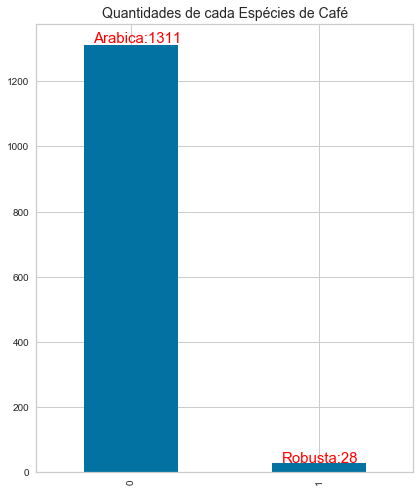

In [156]:
# Exibe as quantidade de cada tipo de espécies
fig, ax = plt.subplots(figsize=(6,7))
coffee.Species.value_counts().plot(kind='bar',ax=ax)
plt.title("Quantidades de cada Espécies de Café",fontsize=14)
style = dict(size=15, color='red')
ax.text(-0.2,1320,"Arabica:1311",**style)
ax.text(0.8,30,"Robusta:28",**style)
plt.tight_layout()
plt.show()

A quantidade de dados da espécie arábica é muito maior (entre 46 vezes maior) do que a quantidade da classe robusta. Isso pode deixa nosso clasificador tendencioso. Portanto, torna-se importante dar conta dessa discrepância e neutralizá-la para que o classificador permaneça imparcial.

### Suport Vector Classification

O modelo usado na primeira classificação será o *Suporte Vector Classification*. É um classificador linear binário não probabilístico. O que uma SVC faz é encontrar uma linha de separação, mais comumente chamada de hiperplano entre dados de duas classes. Essa linha busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes.

O parâmetro *class_weight* do classificasor conta o número de dados em cada classes e ajusta os pesos para que o desequilíbrio entre as classes de espécies não afete adversamente o desempenho do classificador.

In [114]:
# Modelo
svc = SVC(class_weight={1:50},kernel='poly',degree=3)
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={1: 50}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


>  Support Vector Classification
>  Accuracy: 1.0


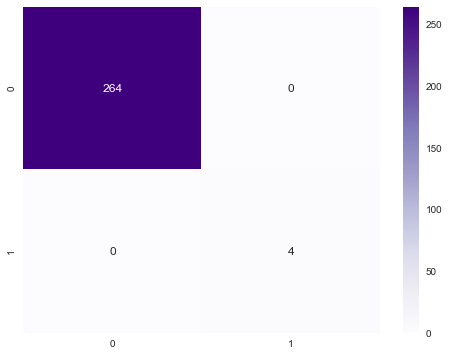

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       264
           1       1.00      1.00      1.00         4

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



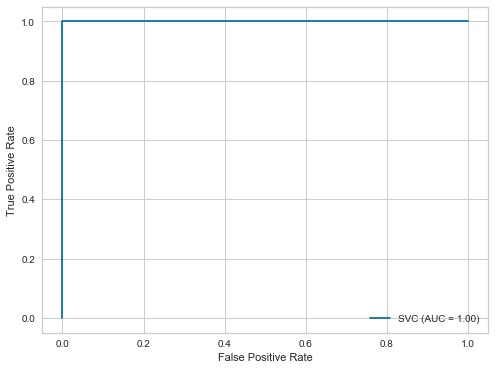

> ROC Accuracy: 1.0


In [115]:
# Previsão, resultado e métrica e avaliação
svc_pred = print_report(svc, X_test, y_test, 'Support Vector Classification')

 O modelo SVC foi preciso em classificar ambas as espécies corretamente.

## 4. Feature Importance

Antes de partir para o segundo classificador, é interessando selecionar um subconjunto de recursos(atributos) relevantes na determinação da qualidade do café para usarmos na construção do modelo.

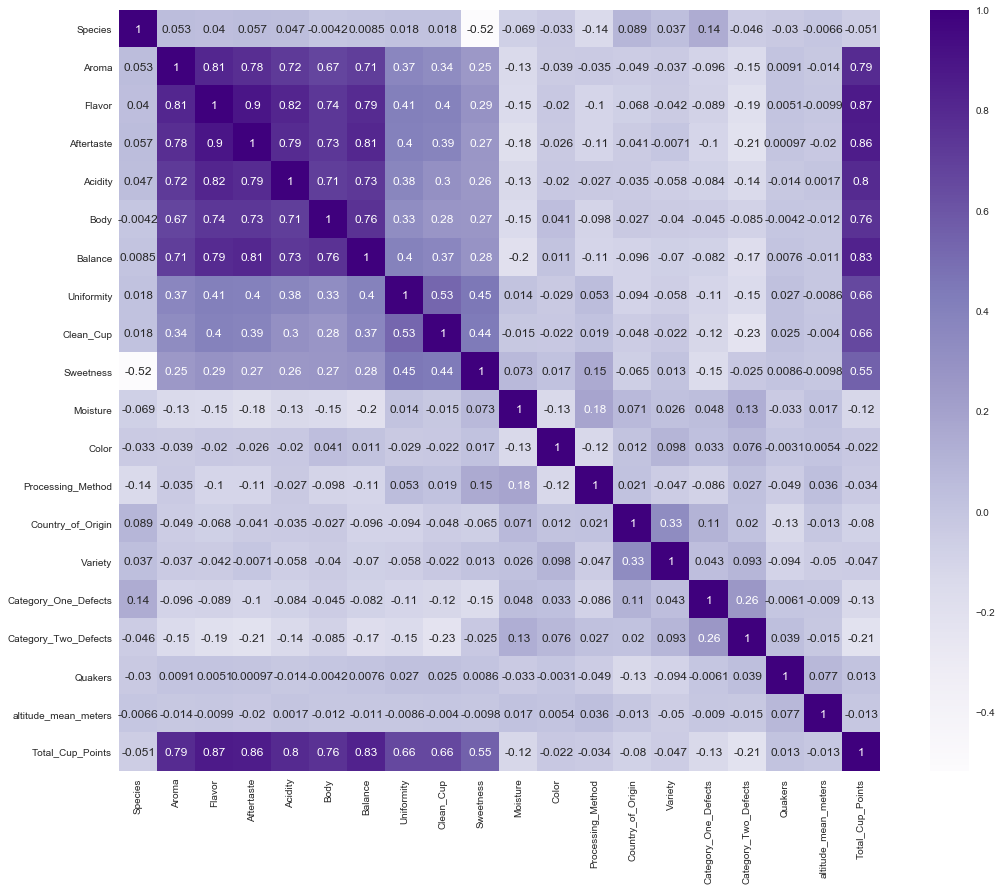

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Moisture,Color,Processing_Method,Country_of_Origin,Variety,Category_One_Defects,Category_Two_Defects,Quakers,altitude_mean_meters,Total_Cup_Points
Species,1.000000,0.052581,0.040467,0.057313,0.046742,-0.004232,0.008499,0.018297,0.017818,-0.517533,-0.068622,-0.033416,-0.142992,0.089166,0.036525,0.142478,-0.045779,-0.030452,-0.006576,-0.050990
Aroma,0.052581,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493,-0.134127,-0.039471,-0.035077,-0.048898,-0.037175,-0.096352,-0.149024,0.009053,-0.014087,0.791627
Flavor,0.040467,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065,-0.145201,-0.019724,-0.102895,-0.068122,-0.042489,-0.088792,-0.191956,0.005077,-0.009948,0.874279
Aftertaste,0.057313,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409,-0.180510,-0.025738,-0.107606,-0.041076,-0.007144,-0.104721,-0.210016,0.000975,-0.020186,0.860656
Acidity,0.046742,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854,-0.129079,-0.019770,-0.026576,-0.035409,-0.057569,-0.084269,-0.136814,-0.013800,0.001671,0.797024
Body,-0.004232,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342,-0.147651,0.041283,-0.097901,-0.027150,-0.040336,-0.044519,-0.085386,-0.004224,-0.011531,0.757165
Balance,0.008499,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272,-0.199843,0.011286,-0.105823,-0.095690,-0.069804,-0.082406,-0.171100,0.007626,-0.011261,0.828502
Uniformity,0.018297,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083,0.013792,-0.028970,0.053257,-0.094196,-0.058201,-0.105890,-0.145833,0.027394,-0.008556,0.656454
Clean_Cup,0.017818,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644,-0.014916,-0.021732,0.018776,-0.048151,-0.021724,-0.115594,-0.232739,0.025339,-0.004015,0.658859
Sweetness,-0.517533,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000,0.072699,0.016598,0.152592,-0.065388,0.012569,-0.150810,-0.024998,0.008630,-0.009825,0.554029


In [165]:
# Correlação entre os atributos
corr = coffee.corr(method='pearson')

# Adiciona cores na tabela
def color_scale(val):
    
    if val > 0.02:
        color = 'green'
    elif val < -0.02:
        color = 'red'
    else:
        color = 'black'

    return 'color: %s' %color

# Plota mapa de calor
plt.rcParams["figure.figsize"] = (18,14)
sns.heatmap(corr,annot=True, cmap="Purples",square=True)
plt.show()

# Tabela corelação
corr.T.style.applymap(color_scale)

Na tabela acima temos a relação de todos os atributos com eles mesmo. Os valores em verde repesentam correlação positiva e maiores que 0.02, os valores em vermelho representam as correlações negativas e menores que 0.02. Esses são os valores que estipulamos como relevantes para afirmar que um atributo afeta o outro. Os valores em preto podem ser considerados com uma correlação muito pobe, quase insignificante.

Vamos usar um visualizador que calcula os coeficientes de correlação de Pearson e as informações mútuas entre os atributos e a variável dependente ('Total_Cup_points'). 

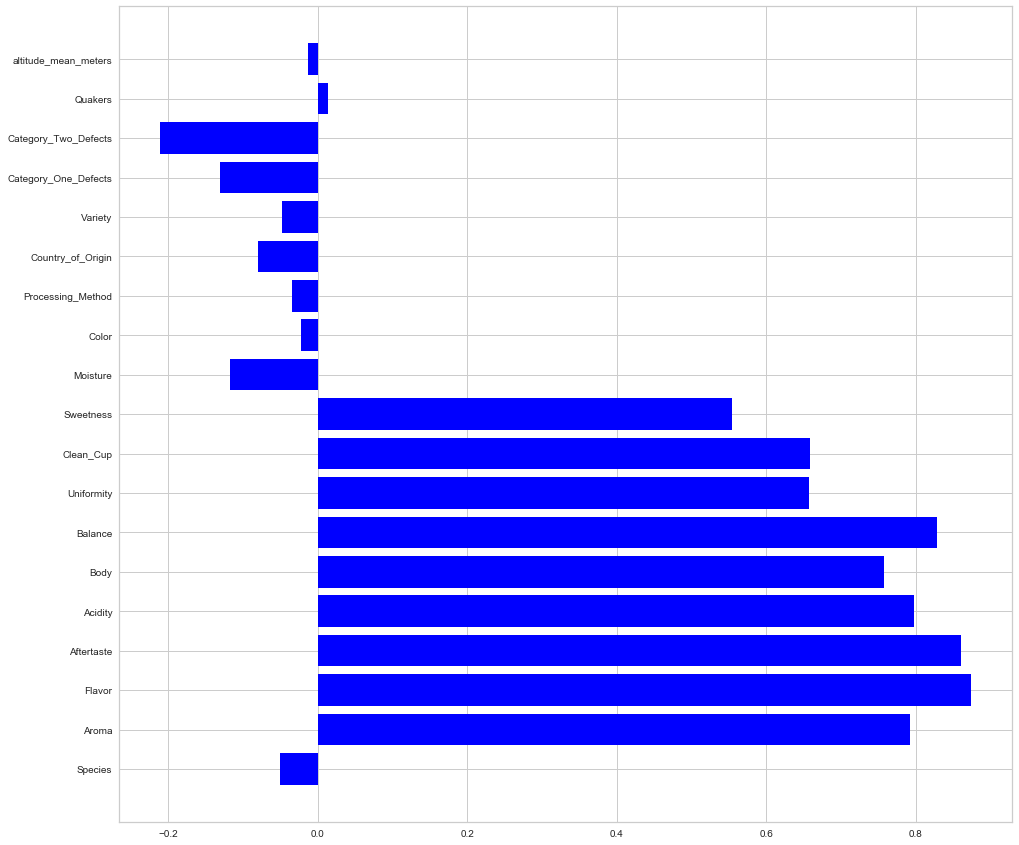

,Flavor,Aftertaste,Balance,Acidity,Aroma,Body,Clean_Cup,Uniformity,Sweetness,Quakers,altitude_mean_meters,Color,Processing_Method,Variety,Species,Country_of_Origin,Moisture,Category_One_Defects,Category_Two_Defects
Total_Cup_Points,0.874279,0.860656,0.828502,0.797024,0.791627,0.757165,0.658859,0.656454,0.554029,0.013199,-0.012896,-0.021635,-0.033728,-0.047313,-0.050990,-0.079927,-0.117722,-0.130009,-0.211085


In [166]:
# Separa os atributos 
feature = coffee.drop(['Total_Cup_Points'],axis=1)
label = coffee['Total_Cup_Points']

fig = plt.figure(figsize=(16,15))
# Plota o visualizador da correlação
visualizer = FeatureCorrelation(labels=feature.columns.values, color = "blue")
visualizer.fit(feature,label)
plt.show()

# Cria uma tabela com as correlações dos atributos com a variável dependente Total_Cup_Points
corr_quality = pd.DataFrame(coffee.corr()["Total_Cup_Points"])\
                .sort_values(by="Total_Cup_Points", ascending=False).drop(["Total_Cup_Points"]).transpose()
corr_quality.style.applymap(color_scale)

Na tabela acima, os valores em verde são as correlações positivas e > 0.02, enquanto que os em vermelho são as correlações negativas e < -0.02.

Podemos dizer que as variáveis *altitude_mean_meters* e *Quakers* não tem correlação com a *Total_Cup_Points*

In [118]:
# Apaga as variáveis irelevantes
coffee2 = coffee.drop(['altitude_mean_meters','Quakers'],axis=1)

## 5. Classificando a Qualidade

Agora vamos criar outro modelo para classificar se o café tem qualidade boa ou ruim. Primeiro temos que defiir quais pontuações podem se classificadas como boa ou ruim.

In [119]:
# Estatísticas da variável dependente
coffee2['Total_Cup_Points'].describe()

count    1339.000000
mean       82.089851
std         3.500575
min         0.000000
25%        81.080000
50%        82.500000
75%        83.670000
max        90.580000
Name: Total_Cup_Points, dtype: float64

O Valor médio da pontuação de Total_Cups_Points é 82, então iremos consideram como qualidade "boa" avaliações acima desse valor e a qualidade "ruim" sendo inferior a esse valor.

In [132]:
# Separa os atributos da variável dependente
features = coffee2.drop(['Total_Cup_Points'],axis=1).to_numpy()
labels = coffee2['Total_Cup_Points']

# Função que classifica como boa (1) ou ruim (0)
def get_label(labels):
    if labels >= 82:
        return 1
    else: 
        return 0

# Aplica a função na variável dependente
labels = labels.apply(lambda x: get_label(x)).to_numpy()

# Separa os dados em conjunto de treino e de teste
X2_train, X2_test, y2_train, y2_test = train_test_split(features,labels,test_size=0.2,random_state=73)


### Logistic Regression

O primeiro modelo testado será o *Logistic Regression*. este é um modelo simples de classificação linear usado para classes binárias (0 ou 1), como é nosso caso.

In [133]:
# Modelo
log = LogisticRegression(max_iter=1000,random_state=73)
# dicionário de parâmetros do modelo
log_params = {'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'C': [0.01, 0.1, 1, 30]
              
             }
# Aplica os diferentes parâmetros no modelo e escolhe o que fornece melhor resultado             
grid_search_log = GridSearchCV(log, log_params, cv=5, verbose=1)
grid_search_log.fit(X2_train, y2_train)

# Fit o modelo co os melhores parâmtros
log_clf = grid_search_log.best_estimator_
log_clf.fit(X2_train, y2_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   14.3s finished


LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=73, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


>  Logistic Regression
>  Accuracy: 0.96


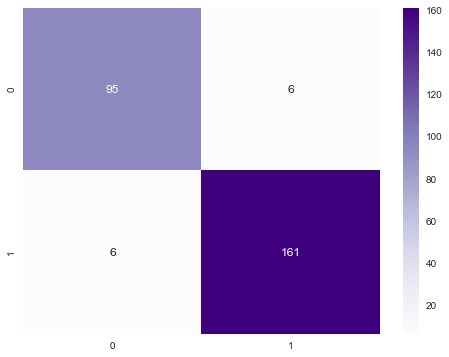

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       101
           1       0.96      0.96      0.96       167

    accuracy                           0.96       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.96      0.96      0.96       268



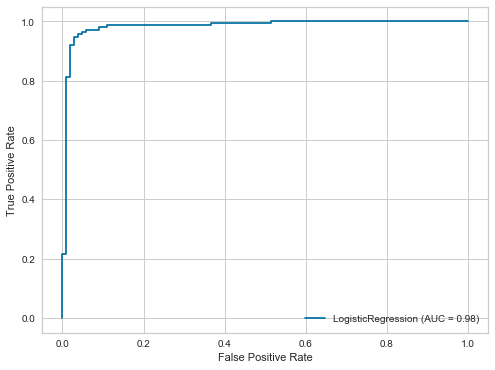

> ROC Accuracy: 0.9523


In [134]:
# Chama a função que calcula as métricas
log_pred = print_report(log_clf, X2_test, y2_test, "Logistic Regression")

Temos um modelo com acurácia de 96% e ROC de 95%.

### Random Forest

In [135]:
forest = RandomForestClassifier(random_state=73)
param_grid_forest = [{'bootstrap': [True],
                      'max_depth': [None],
                      'criterion': ["entropy"],
                      "class_weight": ["balanced"],
                      'max_features': ['log2'],
                      'min_samples_leaf': [2],
                      'min_samples_split': [2, 5],
                      'ccp_alpha': [0.01, 1],
                      'n_estimators': [200, 220, 250] 
                     }]

grid_search_forest = GridSearchCV(forest, param_grid_forest, cv=5, verbose=1)
grid_search_forest.fit(X2_train, y2_train)

forest_clf = grid_search_forest.best_estimator_
forest_clf.fit(X2_train, y2_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   47.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=73, verbose=0,
                       warm_start=False)


>  Random Forest Classification
>  Accuracy: 0.91


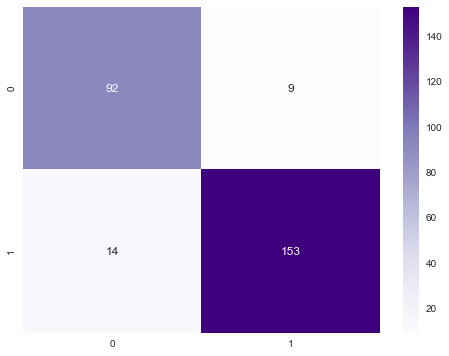

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       101
           1       0.94      0.92      0.93       167

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.92      0.91      0.91       268



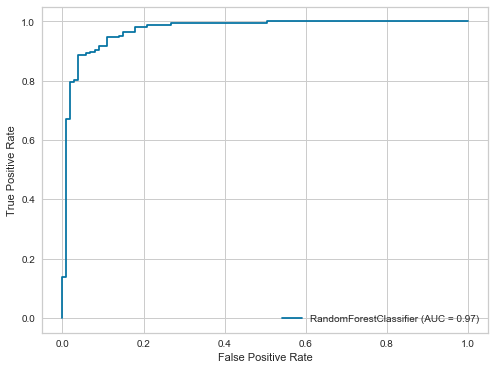

> ROC Accuracy: 0.9135


In [136]:
forest_pred = print_report(forest_clf, X2_test, y2_test, "Random Forest Classification")

Temos um modelo com acurácia e ROC de 91%. este modelo teve mais erros de classificação que o anterior.

## 6. Conclusão

Conseguimos criar um classificador que é capaz de distinguir entre as espécies de café arábica e robusta usando o modlo Support Vector Classification.

Comparamos dois modelos, Logistic Regression e Random Forest Classifier, e conseguimos um classificador para apontar se um café tem qualidade boa ou ruim. Logistic Regression apresentou resultados mais precisos.

Para encerrar, criamos uma tabela com os valores reais de qualidade do café e as previsões do dois modelos para comparação.

In [137]:
# Função que clssifica como Boa ou Ruim
def get_str(value):
    if value == 1:
        return "Boa ({})".format(str(value))
    else:
        return "Ruim ({})".format(str(value))
        
# Função que adiciona cores
def color_(val):
    color = 'black'
    if isinstance(val,str):
        if "Boa" in val:
            color = 'green'
        if "Ruim" in val:
            color = 'orange'
    return 'color: %s' %color  

In [170]:
 # DataFrame com os valores reais e as previsões aplicando
results_quality = pd.DataFrame()
results_quality['real_qualidade'] = pd.DataFrame(y2_test)[0].apply(lambda x: get_str(x))
results_quality['previsão_Logistic'] = pd.DataFrame(log_pred)[0].apply(lambda x: get_str(x))
results_quality['previsão_Forest'] = pd.DataFrame(forest_pred)[0].apply(lambda x: get_str(x))
# Embaralha as linhas do DataFrame
results_quality = results_quality.sample(frac=1,random_state=73)
results_quality.head(10).style.applymap(color_)


,real_qualidade,previsão_Logistic,previsão_Forest
188,Boa (1),Ruim (0),Boa (1)
141,Boa (1),Boa (1),Boa (1)
183,Boa (1),Boa (1),Boa (1)
59,Ruim (0),Ruim (0),Ruim (0)
167,Boa (1),Boa (1),Boa (1)
217,Boa (1),Boa (1),Ruim (0)
115,Boa (1),Boa (1),Boa (1)
19,Ruim (0),Ruim (0),Ruim (0)
156,Boa (1),Boa (1),Boa (1)
112,Boa (1),Boa (1),Boa (1)
